In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)

import pandasql as psql


In [4]:
#load the universal bank data
data=pd.read_csv(r"C:\Users\tanin\OneDrive\Desktop\sree\clean_dataset.csv",header=0)
data_bk=data.copy()
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,690.0,0.695652,0.460464,0.00,0.000,1.00,1.0000,1.00
Age,690.0,31.514116,11.860245,13.75,22.670,28.46,37.7075,80.25
Debt,690.0,4.758725,4.978163,0.00,1.000,2.75,7.2075,28.00
Married,690.0,0.760870,0.426862,0.00,1.000,1.00,1.0000,1.00
BankCustomer,690.0,0.763768,0.425074,0.00,1.000,1.00,1.0000,1.00
Industry,690.0,5.531884,3.417236,0.00,3.000,5.00,8.0000,13.00
Ethnicity,690.0,2.852174,1.491593,0.00,1.000,4.00,4.0000,4.00
YearsEmployed,690.0,2.223406,3.346513,0.00,0.165,1.00,2.6250,28.50
PriorDefault,690.0,0.523188,0.499824,0.00,0.000,1.00,1.0000,1.00
Employed,690.0,0.427536,0.495080,0.00,0.000,0.00,1.0000,1.00


In [5]:
sr=data.corr()

<Axes: >

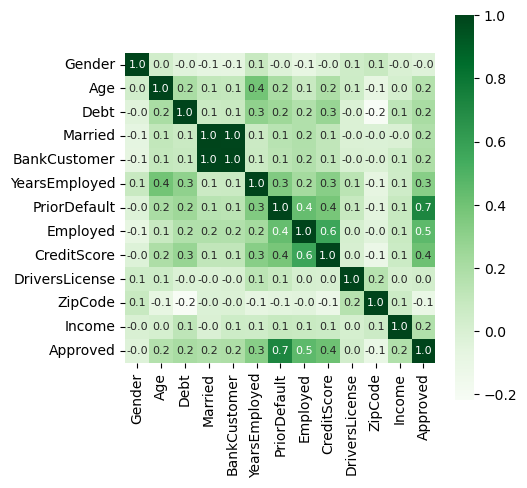

In [33]:
plt.figure(figsize=(5,5))
sns.heatmap(sr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Greens")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [7]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [8]:
data_dup=data[data.duplicated(keep='last')]
data_dup

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved


In [9]:
data['Industry'].value_counts()

Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServices     38
Utilities                 38
Real Estate               30
Education                 25
Research                  10
Transport                  3
Name: Industry, dtype: int64

In [10]:
data['Citizen'].value_counts()

ByBirth         625
ByOtherMeans     57
Temporary         8
Name: Citizen, dtype: int64

In [11]:
data.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [12]:
#use LabelEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Industry']=LE.fit_transform(data['Industry'])
data['Ethnicity']=LE.fit_transform(data['Ethnicity'])
data['Citizen']=LE.fit_transform(data['Citizen'])
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int32  
 6   Ethnicity       690 non-null    int32  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int32  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int32(3), int64(10)
memory usage: 78.3 KB


In [14]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

Approved_count =data.Approved.value_counts()
print('Class 0:', Approved_count[0])
print('Class 1:', Approved_count[1])
print('Proportion:', round(Approved_count[0] / Approved_count[1], 2), ': 1')
print('Total records:',len(data))

Class 0: 383
Class 1: 307
Proportion: 1.25 : 1
Total records: 690


In [15]:
#identify the independent and target varibles
IndepVar=[]
for col in data.columns:
    if col!='Approved':
        IndepVar.append(col)
TargetVar='Approved'
x=data[IndepVar]
y=data[TargetVar]

In [16]:
#split the data into  train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((483, 15), (207, 15), (483,), (207,))

In [17]:
#scaling the features by using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
# x_train=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)
# x_train=mmscaler.fit_transform(x_train[cols])
x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
ModelLR=LogisticRegression()
#train the model
ModelLR.fit(x_train,y_train)
#predict the model with test data set
y_pred=ModelLR.predict(x_test)
y_pred_prob=ModelLR.predict_proba(x_test)

# Logistic Regression

In [19]:
#to display algorithm parameters
params=ModelLR.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Confusion matrix:
 [[79 11]
 [20 97]]
OutCome values:
 79 11 20 97
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.88      0.84        90
           0       0.90      0.83      0.86       117

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 79.8 %
Recall : 87.8 %
F1 Score : 0.836
Specificity or True Negative Rate : 82.9 %
Balanced Accuracy : 85.3 %
MCC : 0.701
roc_auc_score: 0.853


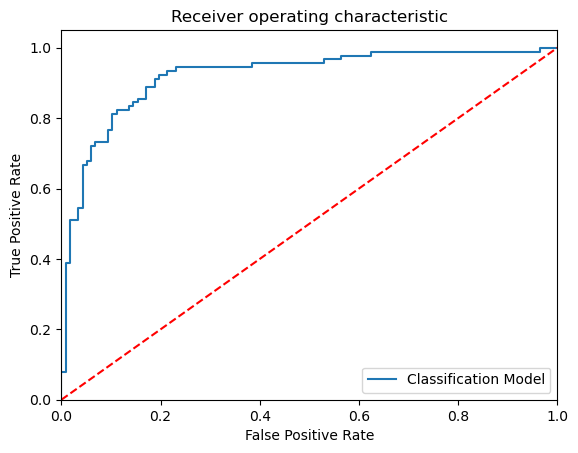

-----------------------------------------------------------------------------------------------------


In [20]:
#cofusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predited values
predicted=y_pred
#confusion matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print('Confusion matrix:\n',matrix)
#outcome values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('OutCome values:\n',tp,fn,fp,tn)
#Classification report for precision,recall f1-score and accuracy

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);

precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print('-----------------------------------------------------------------------------------------------------')

In [21]:
Results = pd.DataFrame({'Approved_A':y_test, 'Approved_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = data_bk.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_A,Approved_P
362,1,26.83,0.540,1,1,Financials,Latino,0.000,0,0,0,0,ByBirth,100,0,0,0,0
258,0,20.75,9.540,1,1,ConsumerDiscretionary,White,0.040,0,0,0,0,ByBirth,200,1000,0,0,0
301,1,18.25,0.165,1,1,Real Estate,White,0.250,0,0,0,1,ByOtherMeans,280,0,0,0,0
55,1,23.33,11.625,0,0,Industrials,White,0.835,1,0,0,1,ByBirth,160,300,1,1,0
374,1,28.17,0.585,1,1,ConsumerStaples,White,0.040,0,0,0,0,ByBirth,260,1004,0,0,0


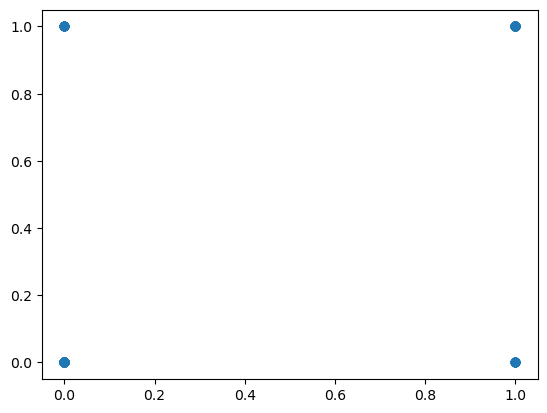

In [39]:
plt.scatter(y_test,y_pred)
plt.show()

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
ModelRF=RandomForestClassifier()
ModelRF.fit(x_train,y_train)
y_pred=ModelRF.predict(x_test)
y_pred_prob=ModelRF.predict_proba(x_test)

params=ModelRF.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Confusion matrix:
 [[ 74  16]
 [ 13 104]]
OutCome values:
 74 16 13 104
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.82      0.84        90
           0       0.87      0.89      0.88       117

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 85.1 %
Recall : 82.2 %
F1 Score : 0.836
Specificity or True Negative Rate : 88.9 %
Balanced Accuracy : 85.5 %
MCC : 0.714
roc_auc_score: 0.856


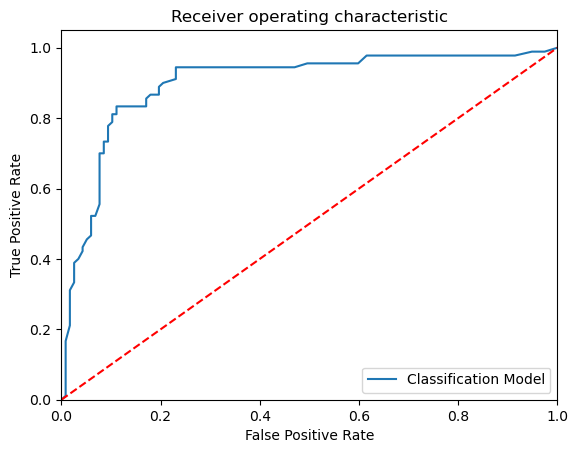

-----------------------------------------------------------------------------------------------------


In [23]:
#cofusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predited values
predicted=y_pred
#confusion matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print('Confusion matrix:\n',matrix)
#outcome values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('OutCome values:\n',tp,fn,fp,tn)
#Classification report for precision,recall f1-score and accuracy

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [24]:
Results = pd.DataFrame({'Approved_A':y_test, 'Approved_P':y_pred})
# Merge two Dataframes on index of both the dataframes
ResultsFinal=data_bk.merge (Results,left_index=True,right_index=True)
# Display 10 records randomly
ResultsFinal.sample(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_A,Approved_P
92,1,28.46,5.000,0,0,ConsumerStaples,White,8.500,1,0,0,0,ByBirth,0,0,0,0,0
211,1,24.33,6.625,0,0,Real Estate,White,5.500,1,0,0,1,ByOtherMeans,100,0,1,1,0
306,1,23.50,2.750,1,1,Healthcare,Latino,4.500,0,0,0,0,ByBirth,160,25,0,0,0
18,1,21.83,0.250,1,1,Real Estate,Black,0.665,1,0,0,1,ByBirth,0,0,1,1,1
397,0,23.58,0.585,0,0,Healthcare,Latino,0.125,0,0,0,0,ByBirth,120,87,0,0,0


# Decision Tree

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Confusion matrix:
 [[64 26]
 [21 96]]
OutCome values:
 64 26 21 96
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.71      0.73        90
           0       0.79      0.82      0.80       117

    accuracy                           0.77       207
   macro avg       0.77      0.77      0.77       207
weighted avg       0.77      0.77      0.77       207

Accuracy : 77.3 %
Precision : 75.3 %
Recall : 71.1 %
F1 Score : 0.731
Specificity or True Negative Rate : 82.1 %
Balanced Accuracy : 76.6 %
MCC : 0.536
roc_auc_score: 0.766


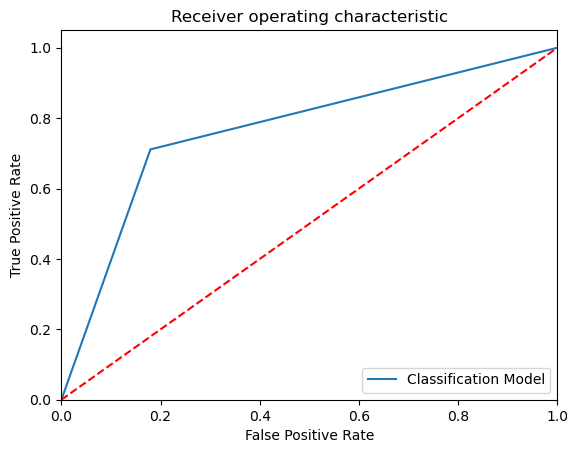

-----------------------------------------------------------------------------------------------------


In [25]:
from sklearn.tree import DecisionTreeClassifier
ModelDT=DecisionTreeClassifier()
ModelDT.fit(x_train,y_train)
y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)

params=ModelDT.get_params()
print(params)

#cofusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predited values
predicted=y_pred
#confusion matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print('Confusion matrix:\n',matrix)
#outcome values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('OutCome values:\n',tp,fn,fp,tn)
#Classification report for precision,recall f1-score and accuracy

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [26]:
Results = pd.DataFrame({'Approved_A':y_test, 'Approved_P':y_pred})
# Merge two Dataframes on index of both the dataframes
ResultsFinal= data_bk.merge (Results,left_index=True,right_index=True)
# Display 10 records randomly
ResultsFinal.sample(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_A,Approved_P
573,0,65.17,14.000,1,1,Healthcare,Latino,0.000,1,1,11,1,ByBirth,0,1400,1,1,1
491,1,24.17,0.875,1,1,Materials,White,4.625,1,1,2,1,ByBirth,520,2000,1,1,1
317,1,17.50,22.000,0,1,Healthcare,Other,0.000,0,0,0,1,Temporary,450,100000,1,1,1
519,1,39.17,1.710,1,1,Utilities,White,0.125,1,1,5,1,ByBirth,480,0,1,1,1
374,1,28.17,0.585,1,1,ConsumerStaples,White,0.040,0,0,0,0,ByBirth,260,1004,0,0,0


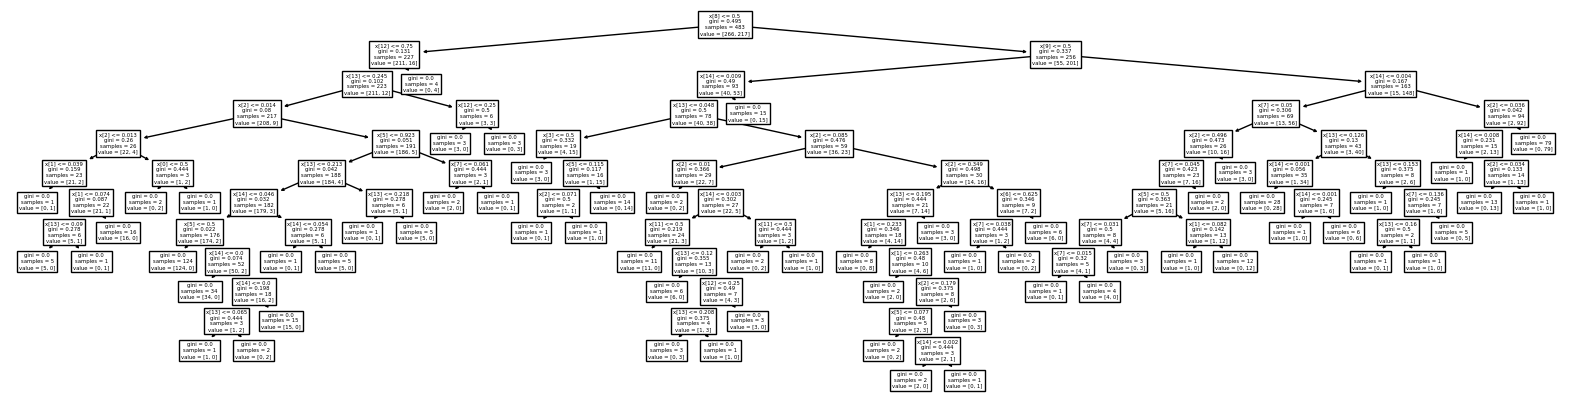

In [27]:
#plot descision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDT);

In [40]:
#load the universal bank data
data=pd.read_csv(r"C:\Users\tanin\OneDrive\Desktop\sree\clean_dataset.csv",header=0)
data_bk=data.copy()
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [41]:
#split the data into  train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((483, 15), (207, 15), (483,), (207,))

In [43]:
from sklearn.linear_model import LogisticRegression
ModelLR=LogisticRegression()
#train the model
ModelLR.fit(x_train,y_train)
#predict the model with test data set
y_pred=ModelLR.predict(x_test)
#y_pred_prob=ModelLR.predict_proba(x_test)

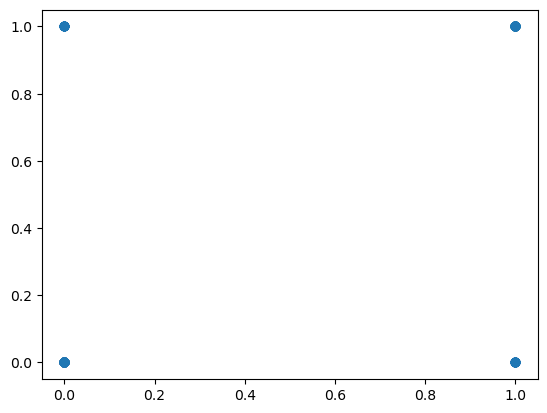

In [46]:
plt.scatter(y_test,y_pred)
plt.show()